<a href="https://colab.research.google.com/github/Sumitha007/Gen_AI/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import ( Dense, Conv2D, Conv2DTranspose, Flatten, Reshape, BatchNormalization, LeakyReLU, Input)



In [1]:

#Hyperparameters
BATCH_SIZE = 64
IMG_SIZE = 128
LATENT_DIM = 100
EPOCHS = 100
LR = 2e-4


In [3]:

def build_generator(latent_dim=100):
  return tf.keras. Sequential([
      Input((latent_dim,)),
      Dense (8*8*512, use_bias=False),
      Reshape((8, 8,512)),
      Conv2DTranspose (256, 4, 2, "same", use_bias=False),
      BatchNormalization(), LeakyReLU(),
      Conv2DTranspose(128, 4, 2, "same", use_bias=False),
      BatchNormalization(), LeakyReLU(),
      Conv2DTranspose (64, 4, 2, "same", use_bias=False),
      BatchNormalization() , LeakyReLU(),
      Conv2DTranspose(3, 4, 2, "same", activation="tanh")
      ], name="Generator")



relu avoid negative value
leakyrelu allow negative value


In [4]:
def build_discriminator(img_size=128):
  return tf.keras. Sequential([
      Input((img_size, img_size, 3)),
      Conv2D (64, 4, 2, "same"),LeakyReLU (0.2),
      Conv2D(128, 4, 2, "same"),LeakyReLU(0.2),
      Conv2D(256, 4, 2, "same"),LeakyReLU (0.2),
      Conv2D(512, 4, 2, "same"),LeakyReLU (0.2),
      Flatten(),
      Dense (1)
      ], name="Discriminator")



In [5]:
G, D = build_generator(), build_discriminator()

In [6]:


loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_opt= tf.keras.optimizers.Adam(LR, 0.5)
d_opt= tf.keras.optimizers.Adam(LR, 8.5)

In [13]:
@tf.function
def train_step(real):
  noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])
  with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
    fake =  G(noise, training=True)
    r_out, f_out = D(real, training=True), D(fake, training=True)
    g_loss= loss_fn(tf.ones_like(f_out), f_out)
    d_loss =loss_fn(tf.ones_like(r_out), r_out) +loss_fn( tf.zeros_like(f_out), f_out)
    g_opt.apply_gradients(zip(g_tape.gradient(g_loss, G.trainable_variables), G.trainable_variables))
    d_opt.apply_gradients(zip(d_tape.gradient(d_loss, D.trainable_variables), D.trainable_variables))
    return g_loss, d_loss

In [8]:


def show_images (epoch, seed):
  preds =  G(seed, training = False)
  preds =(preds+1)/2.0
  fig, axes= plt.subplots (4,4, figsize= (6,6))
  for i, ax in enumerate (axes.flat):
    ax.imshow(preds[1].numpy())
    ax.axis("off")

plt.suptitle(f"Epoch (epoch)")
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:

#Load dataset (resize to 128x128, normalize to [-1,1])
train_ds = tf.keras.utils.image_dataset_from_directory(

    "/content/drive/MyDrive/FakeFace-main",

    label_mode=None,

    image_size=(IMG_SIZE, IMG_SIZE),

    batch_size=BATCH_SIZE

).map(lambda x: (tf.cast(x, tf.float32) / 127.5) - 1.0).prefetch( tf.data.AUTOTUNE)

Found 362 files.


Epoch 1/100 | G: 0.507 D: 1.299
Epoch 2/100 | G: 0.161 D: 2.217
Epoch 3/100 | G: 0.087 D: 2.796
Epoch 4/100 | G: 0.059 D: 3.148
Epoch 5/100 | G: 0.043 D: 3.520
Epoch 6/100 | G: 0.032 D: 3.810
Epoch 7/100 | G: 0.028 D: 3.916
Epoch 8/100 | G: nan D: nan
Epoch 9/100 | G: nan D: nan
Epoch 10/100 | G: nan D: nan
Epoch 11/100 | G: nan D: nan
Epoch 12/100 | G: nan D: nan
Epoch 13/100 | G: nan D: nan
Epoch 14/100 | G: nan D: nan
Epoch 15/100 | G: nan D: nan
Epoch 16/100 | G: nan D: nan
Epoch 17/100 | G: nan D: nan
Epoch 18/100 | G: nan D: nan
Epoch 19/100 | G: nan D: nan
Epoch 20/100 | G: nan D: nan
Epoch 21/100 | G: nan D: nan
Epoch 22/100 | G: nan D: nan
Epoch 23/100 | G: nan D: nan
Epoch 24/100 | G: nan D: nan
Epoch 25/100 | G: nan D: nan
Epoch 26/100 | G: nan D: nan
Epoch 27/100 | G: nan D: nan
Epoch 28/100 | G: nan D: nan
Epoch 29/100 | G: nan D: nan
Epoch 30/100 | G: nan D: nan
Epoch 31/100 | G: nan D: nan
Epoch 32/100 | G: nan D: nan
Epoch 33/100 | G: nan D: nan
Epoch 34/100 | G: nan D:

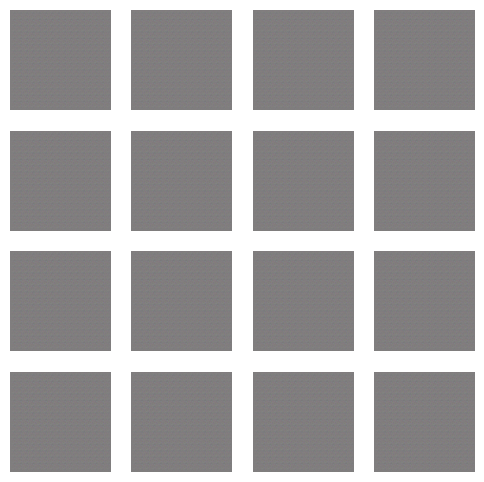

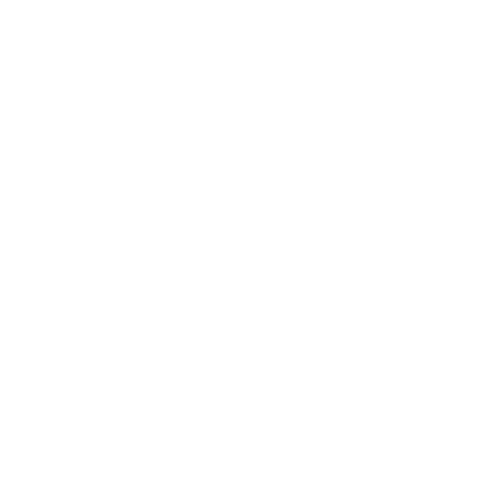

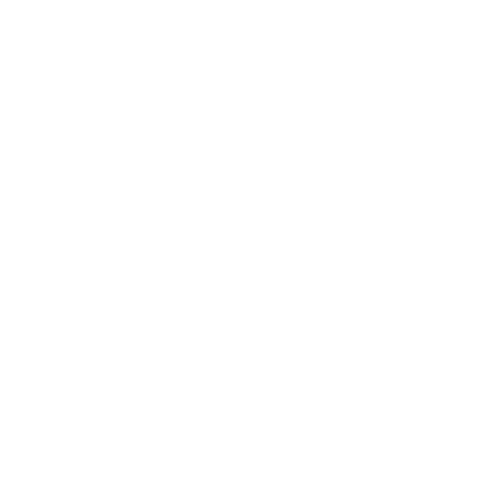

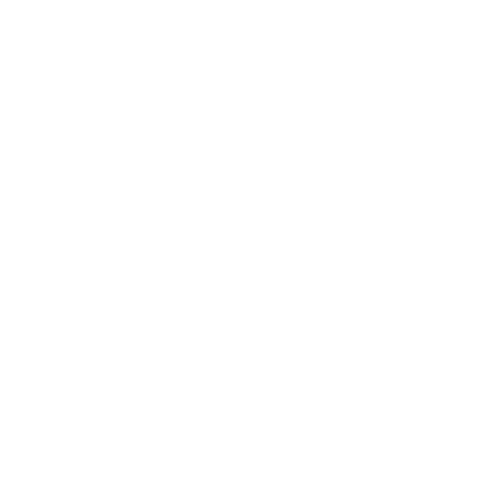

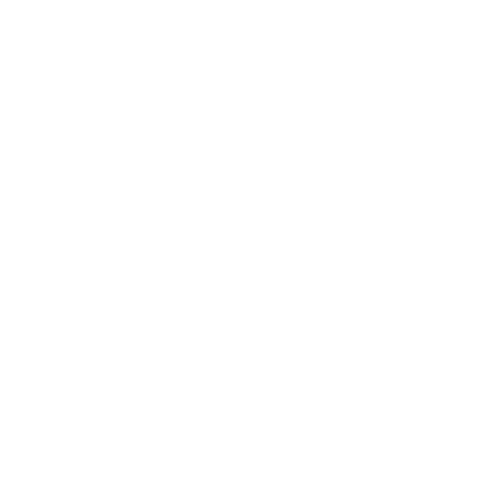

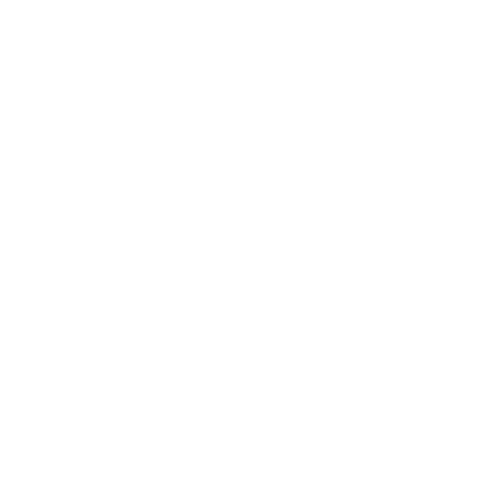

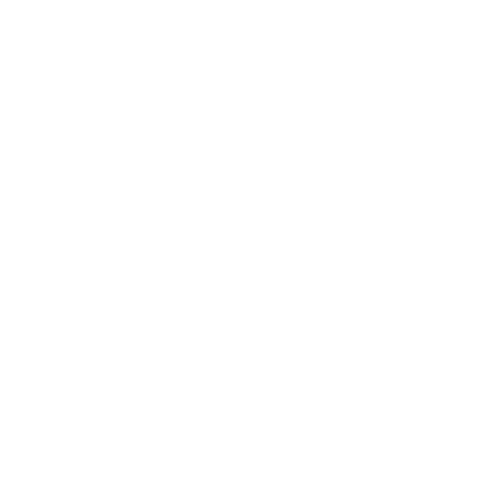

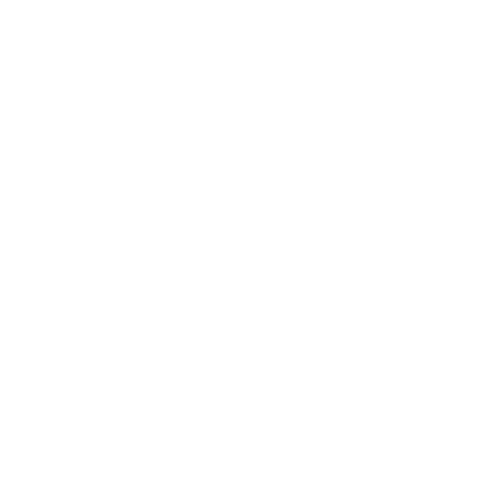

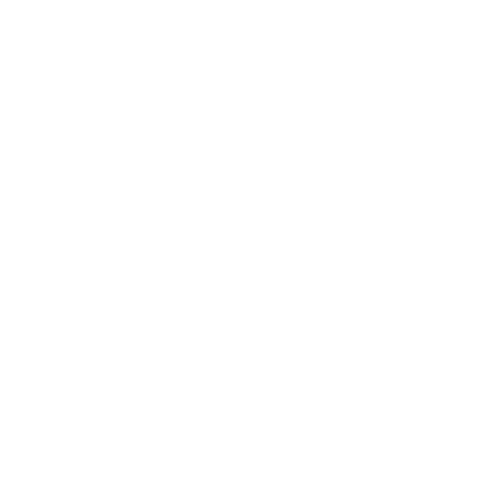

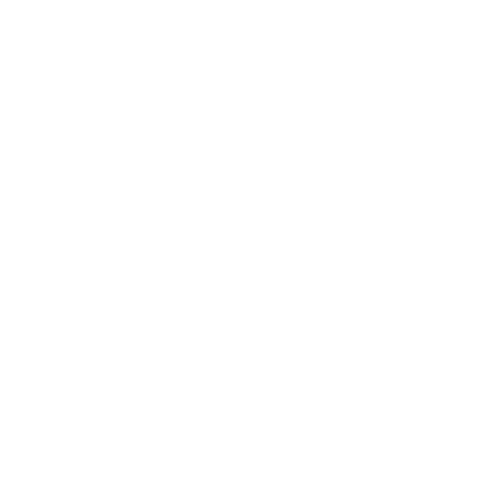

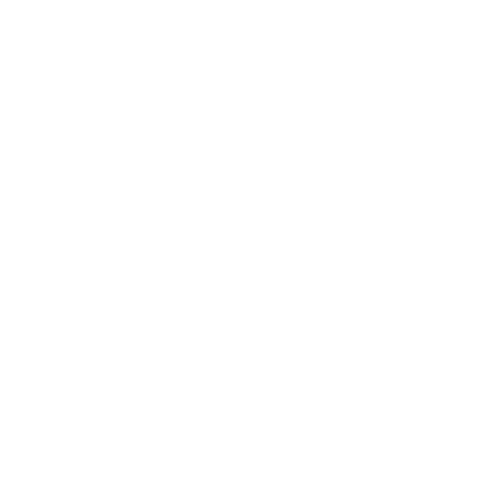

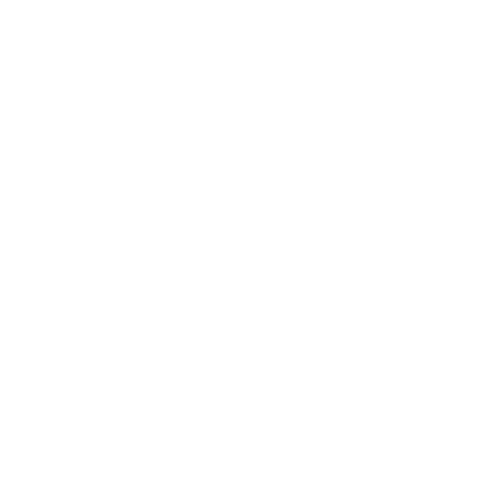

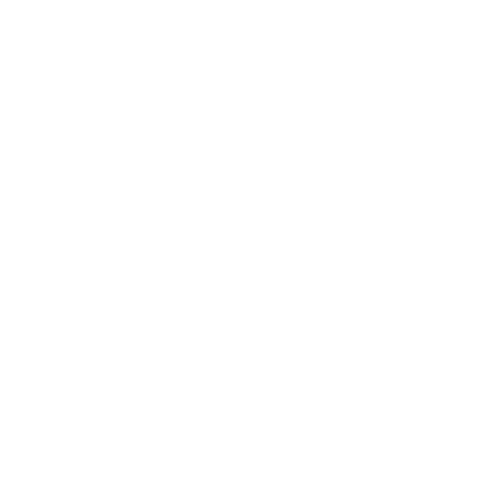

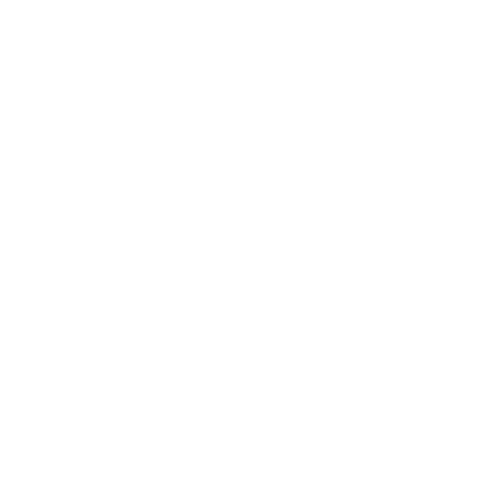

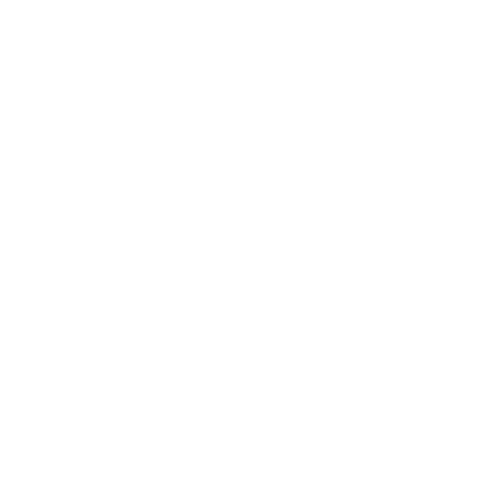

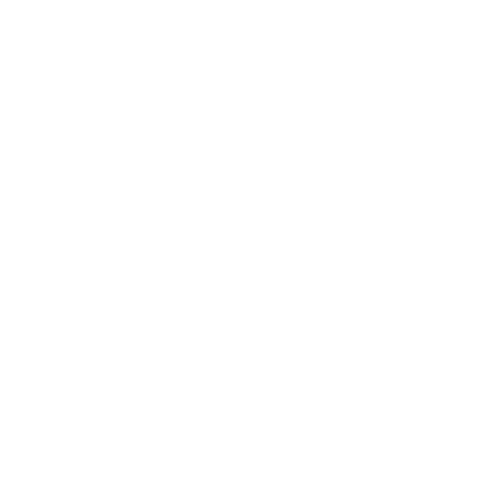

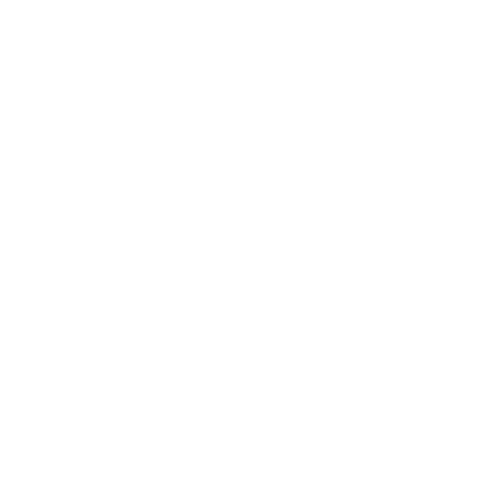

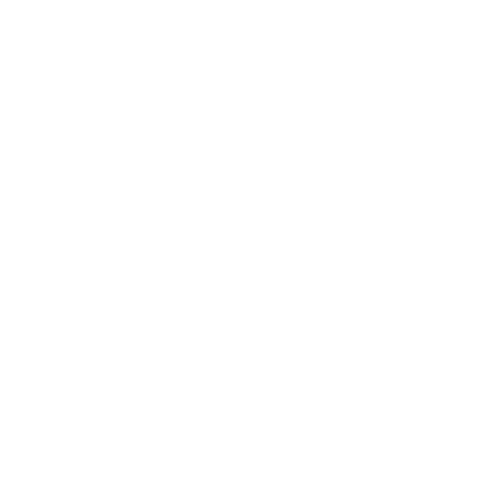

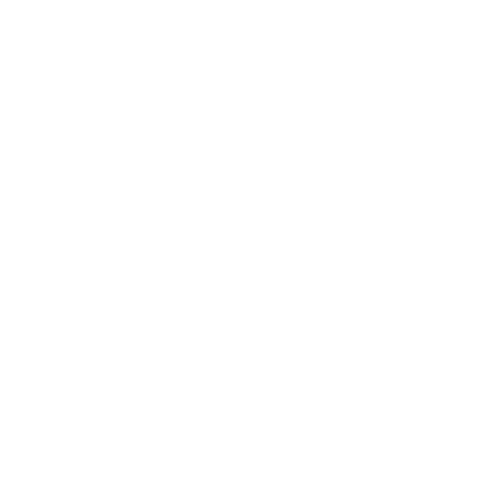

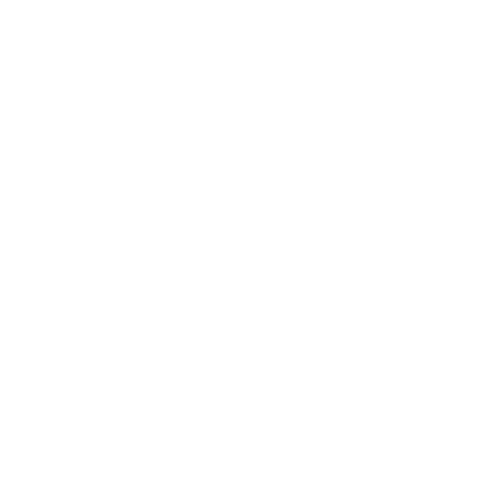

In [14]:
# Training loop

seed = tf.random.normal([16, LATENT_DIM])

for e in range(1, EPOCHS+1):
  for real in train_ds:
    g_loss, d_loss = train_step(real)
  print(f"Epoch {e}/{EPOCHS} | G: {g_loss:.3f} D: {d_loss:.3f}")
  if e % 5 == 0: show_images(e, seed)